In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [4]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

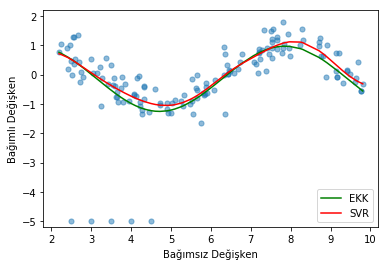

In [5]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [6]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

In [15]:
# Tahmin
y_pred=svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

473.4445984431814

In [16]:
# Model Tuning
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
svr_params={"C":[0.1,0.4,5,10,20,30,40,50]}
svr_cv_model=GridSearchCV(svr_rbf,svr_params,cv=10)
svr_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
pd.Series(svr_cv_model.best_params_)[0]

20

In [21]:
svr_tuned=SVR("rbf",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [22]:
y_pred=svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

472.20974524750574